# 0. Setup Paths

In [1]:
import os
import wget

In [2]:
CUSTOM_MODEL_NAME = 'my_ssd_mobnet' 
PRETRAINED_MODEL_NAME = 'ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8'
PRETRAINED_MODEL_URL = 'http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz'
TF_RECORD_SCRIPT_NAME = 'generate_tfrecord.py'
LABEL_MAP_NAME = 'label_map.pbtxt'

In [3]:
paths = {
    'WORKSPACE_PATH': os.path.join('Tensorflow', 'workspace'),
    'SCRIPTS_PATH': os.path.join('Tensorflow','scripts'),
    'APIMODEL_PATH': os.path.join('Tensorflow','models'),
    'ANNOTATION_PATH': os.path.join('Tensorflow', 'workspace','annotations'),
    'IMAGE_PATH': os.path.join('Tensorflow', 'workspace','images'),
    'MODEL_PATH': os.path.join('Tensorflow', 'workspace','models'),
    'PRETRAINED_MODEL_PATH': os.path.join('Tensorflow', 'workspace','pre-trained-models'),
    'CHECKPOINT_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME), 
    'OUTPUT_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'export'), 
    'TFJS_PATH':os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfjsexport'), 
    'TFLITE_PATH':os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfliteexport'), 
    'PROTOC_PATH':os.path.join('Tensorflow','protoc')
 }

In [4]:
files = {
    'PIPELINE_CONFIG':os.path.join('Tensorflow', 'workspace','models', CUSTOM_MODEL_NAME, 'pipeline.config'),
    'TF_RECORD_SCRIPT': os.path.join(paths['SCRIPTS_PATH'], TF_RECORD_SCRIPT_NAME), 
    'LABELMAP': os.path.join(paths['ANNOTATION_PATH'], LABEL_MAP_NAME)
}

In [5]:
for path in paths.values():
    if not os.path.exists(path):
        if os.name == 'posix':
            !mkdir -p {path}
        if os.name == 'nt':
            !mkdir {path}

# 1. Download TF Models Pretrained Models from Tensorflow Model Zoo and Install TFOD

In [6]:
# https://www.tensorflow.org/install/source_windows

In [7]:
if os.name=='nt':
    !pip install wget
    import wget

You should consider upgrading via the 'D:\Projects\object_detection\venv\Scripts\python.exe -m pip install --upgrade pip' command.


In [9]:
if not os.path.exists(os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection')):
    !git clone https://github.com/tensorflow/models {paths['APIMODEL_PATH']}

Cloning into 'Tensorflow\models'...
Updating files:  28% (860/2980)
Updating files:  29% (865/2980)
Updating files:  30% (894/2980)
Updating files:  31% (924/2980)
Updating files:  32% (954/2980)
Updating files:  33% (984/2980)
Updating files:  34% (1014/2980)
Updating files:  35% (1043/2980)
Updating files:  36% (1073/2980)
Updating files:  37% (1103/2980)
Updating files:  38% (1133/2980)
Updating files:  39% (1163/2980)
Updating files:  40% (1192/2980)
Updating files:  41% (1222/2980)
Updating files:  42% (1252/2980)
Updating files:  43% (1282/2980)
Updating files:  44% (1312/2980)
Updating files:  45% (1341/2980)
Updating files:  46% (1371/2980)
Updating files:  47% (1401/2980)
Updating files:  48% (1431/2980)
Updating files:  49% (1461/2980)
Updating files:  50% (1490/2980)
Updating files:  51% (1520/2980)
Updating files:  52% (1550/2980)
Updating files:  53% (1580/2980)
Updating files:  54% (1610/2980)
Updating files:  55% (1639/2980)
Updating files:  56% (1669/2980)
Updating file

In [10]:
# Install Tensorflow Object Detection 
if os.name=='posix':  
    !apt-get install protobuf-compiler
    !cd Tensorflow/models/research && protoc object_detection/protos/*.proto --python_out=. && cp object_detection/packages/tf2/setup.py . && python -m pip install . 
    
if os.name=='nt':
    url="https://github.com/protocolbuffers/protobuf/releases/download/v3.15.6/protoc-3.15.6-win64.zip"
    wget.download(url)
    !move protoc-3.15.6-win64.zip {paths['PROTOC_PATH']}
    !cd {paths['PROTOC_PATH']} && tar -xf protoc-3.15.6-win64.zip
    os.environ['PATH'] += os.pathsep + os.path.abspath(os.path.join(paths['PROTOC_PATH'], 'bin'))   
    !cd Tensorflow/models/research && protoc object_detection/protos/*.proto --python_out=. && copy object_detection\\packages\\tf2\\setup.py setup.py && python setup.py build && python setup.py install
    !cd Tensorflow/models/research/slim && pip install -e . 

 62% [..............................................                            ]  917504 / 1468733

100% [..........................................................................] 1468733 / 1468733        1 file(s) moved.
        1 file(s) copied.
running build
running build_py
creating build
creating build\lib
creating build\lib\object_detection
copying object_detection\eval_util.py -> build\lib\object_detection
copying object_detection\eval_util_test.py -> build\lib\object_detection
copying object_detection\exporter.py -> build\lib\object_detection
copying object_detection\exporter_lib_tf2_test.py -> build\lib\object_detection
copying object_detection\exporter_lib_v2.py -> build\lib\object_detection
copying object_detection\exporter_main_v2.py -> build\lib\object_detection
copying object_detection\exporter_tf1_test.py -> build\lib\object_detection
copying object_detection\export_inference_graph.py -> build\lib\object_detection
copying object_detection\export_tflite_graph_lib_tf2.py -> build\lib\object_detection
copying object_detection\export_tflite_graph_lib_tf2_test.py -> build

zip_safe flag not set; analyzing archive contents...
object_detection.core.__pycache__.densepose_ops.cpython-39: module references __file__
object_detection.core.__pycache__.preprocessor.cpython-39: module MAY be using inspect.stack
object_detection.utils.__pycache__.autoaugment_utils.cpython-39: module MAY be using inspect.stack
error: Setup script exited with error: Microsoft Visual C++ 14.0 or greater is required. Get it with "Microsoft C++ Build Tools": https://visualstudio.microsoft.com/visual-cpp-build-tools/


copying object_detection\meta_architectures\context_rcnn_lib_tf1_test.py -> build\lib\object_detection\meta_architectures
copying object_detection\meta_architectures\context_rcnn_lib_tf2.py -> build\lib\object_detection\meta_architectures
copying object_detection\meta_architectures\context_rcnn_lib_tf2_test.py -> build\lib\object_detection\meta_architectures
copying object_detection\meta_architectures\context_rcnn_meta_arch.py -> build\lib\object_detection\meta_architectures
copying object_detection\meta_architectures\context_rcnn_meta_arch_test.py -> build\lib\object_detection\meta_architectures
copying object_detection\meta_architectures\deepmac_meta_arch.py -> build\lib\object_detection\meta_architectures
copying object_detection\meta_architectures\deepmac_meta_arch_test.py -> build\lib\object_detection\meta_architectures
copying object_detection\meta_architectures\faster_rcnn_meta_arch.py -> build\lib\object_detection\meta_architectures
copying object_detection\meta_architectures\f

byte-compiling build\bdist.win-amd64\egg\object_detection\models\ssd_mobiledet_feature_extractor_tf1_test.py to ssd_mobiledet_feature_extractor_tf1_test.cpython-39.pyc
byte-compiling build\bdist.win-amd64\egg\object_detection\models\ssd_mobilenet_edgetpu_feature_extractor.py to ssd_mobilenet_edgetpu_feature_extractor.cpython-39.pyc
byte-compiling build\bdist.win-amd64\egg\object_detection\models\ssd_mobilenet_edgetpu_feature_extractor_testbase.py to ssd_mobilenet_edgetpu_feature_extractor_testbase.cpython-39.pyc
byte-compiling build\bdist.win-amd64\egg\object_detection\models\ssd_mobilenet_edgetpu_feature_extractor_tf1_test.py to ssd_mobilenet_edgetpu_feature_extractor_tf1_test.cpython-39.pyc
byte-compiling build\bdist.win-amd64\egg\object_detection\models\ssd_mobilenet_v1_feature_extractor.py to ssd_mobilenet_v1_feature_extractor.cpython-39.pyc
byte-compiling build\bdist.win-amd64\egg\object_detection\models\ssd_mobilenet_v1_feature_extractor_tf1_test.py to ssd_mobilenet_v1_feature_ex

Obtaining file:///D:/Projects/object_detection/model/Tensorflow/models/research/slim

ERROR: After October 2020 you may experience errors when installing or updating packages. This is because pip will change the way that it resolves dependency conflicts.

We recommend you use --use-feature=2020-resolver to test your packages with the new resolver before it becomes the default.

object-detection 0.1 requires apache-beam, which is not installed.
object-detection 0.1 requires avro-python3, which is not installed.
object-detection 0.1 requires contextlib2, which is not installed.
object-detection 0.1 requires Cython, which is not installed.
object-detection 0.1 requires matplotlib, which is not installed.
object-detection 0.1 requires pycocotools, which is not installed.
tf-models-official 2.7.0 requires Cython, which is not installed.
tf-models-official 2.7.0 requires gin-config, which is not installed.
tf-models-official 2.7.0 requires google-api-python-client>=1.6.7, which is not installed.
tf-models-official 2.7.0 requires kaggle>=1.3.9, which is not installed.
tf-model


  Running setup.py develop for slim


In [21]:
VERIFICATION_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'builders', 'model_builder_tf2_test.py')
# Verify Installation
!python {VERIFICATION_SCRIPT}

2022-01-01 12:41:18.239081: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2022-01-01 12:41:18.239148: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-01-01 12:41:26.822315: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'nvcuda.dll'; dlerror: nvcuda.dll not found
2022-01-01 12:41:26.822541: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-01-01 12:41:26.829456: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: LAPTOP-VARBFK36
2022-01-01 12:41:26.829588: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: LAPTOP-VARBFK36
Running tests under Python 3.9.1: D:\Projects\object_detection\venv\Scripts\python.exe
[ RUN      ] ModelB

I0101 12:42:09.923951  1720 ssd_efficientnet_bifpn_feature_extractor.py:142] EfficientDet EfficientNet backbone version: efficientnet-b7
I0101 12:42:09.924950  1720 ssd_efficientnet_bifpn_feature_extractor.py:144] EfficientDet BiFPN num filters: 384
I0101 12:42:09.924950  1720 ssd_efficientnet_bifpn_feature_extractor.py:145] EfficientDet BiFPN num iterations: 8
I0101 12:42:09.927958  1720 efficientnet_model.py:147] round_filter input=32 output=64
I0101 12:42:09.952952  1720 efficientnet_model.py:147] round_filter input=32 output=64
I0101 12:42:09.952952  1720 efficientnet_model.py:147] round_filter input=16 output=32
I0101 12:42:10.400229  1720 efficientnet_model.py:147] round_filter input=16 output=32
I0101 12:42:10.401229  1720 efficientnet_model.py:147] round_filter input=24 output=48
I0101 12:42:11.722085  1720 efficientnet_model.py:147] round_filter input=24 output=48
I0101 12:42:11.722085  1720 efficientnet_model.py:147] round_filter input=40 output=80
I0101 12:42:12.767801  1720

In [12]:
!pip install tensorflow --upgrade

  Using cached typing_extensions-4.0.1-py3-none-any.whl (22 kB)
  Using cached protobuf-3.19.1-cp39-cp39-win_amd64.whl (895 kB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)

ERROR: After October 2020 you may experience errors when installing or updating packages. This is because pip will change the way that it resolves dependency conflicts.

We recommend you use --use-feature=2020-resolver to test your packages with the new resolver before it becomes the default.

object-detection 0.1 requires apache-beam, which is not installed.
object-detection 0.1 requires avro-python3, which is not installed.
object-detection 0.1 requires contextlib2, which is not installed.
object-detection 0.1 requires Cython, which is not installed.
object-detection 0.1 requires matplotlib, which is not installed.
object-detection 0.1 requires pycocotools, which is not installed.


  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached termcolor-1.1.0.tar.gz (3.9 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached requests-2.26.0-py2.py3-none-any.whl (62 kB)
  Using cached tensorboard_data_server-0.6.1-py3-none-any.whl (2.4 kB)
  Using cached tensorboard_plugin_wit-1.8.0-py3-none-any.whl (781 kB)
  Using cached urllib3-1.26.7-py2.py3-none-any.whl (138 kB)
  Using cached charset_normalizer-2.0.9-py3-none-any.whl (39 kB)
  Using cached requests_oauthlib-1.3.0-py2.py3-none-any.whl (23 kB)
  Using cached pyasn1_modules-0.2.8-py2.py3-none-any.whl (155 kB)
  Using cached oauthlib-3.1.1-py2.py3-none-any.whl (146 kB)
  Using cached pyasn1-0.4.8-py2.py3-none-any.whl (77 kB)
  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4847 sha256=14c8f2c8994c4a5b0d493eae31828d00b8f506


tf-models-official 2.7.0 requires Cython, which is not installed.
tf-models-official 2.7.0 requires gin-config, which is not installed.
tf-models-official 2.7.0 requires google-api-python-client>=1.6.7, which is not installed.
tf-models-official 2.7.0 requires kaggle>=1.3.9, which is not installed.
tf-models-official 2.7.0 requires matplotlib, which is not installed.
tf-models-official 2.7.0 requires oauth2client, which is not installed.
tf-models-official 2.7.0 requires opencv-python-headless, which is not installed.
tf-models-official 2.7.0 requires psutil>=5.4.3, which is not installed.
tf-models-official 2.7.0 requires py-cpuinfo>=3.3.0, which is not installed.
tf-models-official 2.7.0 requires pycocotools, which is not installed.
tf-models-official 2.7.0 requires pyyaml>=5.1, which is not installed.
tf-models-official 2.7.0 requires sacrebleu, which is not installed.
tf-models-official 2.7.0 requires sentencepiece, which is not installed.
tf-models-official 2.7.0 requires seqeval

In [22]:
!pip uninstall protobuf matplotlib -y
!pip install protobuf matplotlib==3.2

Found existing installation: protobuf 3.19.1
Uninstalling protobuf-3.19.1:
  Successfully uninstalled protobuf-3.19.1
Found existing installation: matplotlib 3.5.1
Uninstalling matplotlib-3.5.1:
  Successfully uninstalled matplotlib-3.5.1
  Using cached protobuf-3.19.1-cp39-cp39-win_amd64.whl (895 kB)
  Using cached matplotlib-3.2.0.tar.gz (40.5 MB)
  Running setup.py clean for matplotlib
Failed to build matplotlib
    Running setup.py install for matplotlib: started
    Running setup.py install for matplotlib: finished with status 'error'


  ERROR: Command errored out with exit status 1:
   command: 'D:\Projects\object_detection\venv\Scripts\python.exe' -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\jonys\\AppData\\Local\\Temp\\pip-install-m2geelw9\\matplotlib\\setup.py'"'"'; __file__='"'"'C:\\Users\\jonys\\AppData\\Local\\Temp\\pip-install-m2geelw9\\matplotlib\\setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\jonys\AppData\Local\Temp\pip-wheel-obtx_1kg'
       cwd: C:\Users\jonys\AppData\Local\Temp\pip-install-m2geelw9\matplotlib\
  Complete output (577 lines):
  
  Edit setup.cfg to change the build options; suppress output with --quiet.
  
  BUILDING MATPLOTLIB
    matplotlib: yes [3.2.0]
        python: yes [3.9.1 (tags/v3.9.1:1e5d33e, Dec  7 2020, 17:08:21) [MSC
                    v.1927 64 bit (AMD64)]]
      platform: yes [win32]
   sample_d

  copying lib\matplotlib\tests\test_cycles.py -> build\lib.win-amd64-3.9\matplotlib\tests
  copying lib\matplotlib\tests\test_dates.py -> build\lib.win-amd64-3.9\matplotlib\tests
  copying lib\matplotlib\tests\test_determinism.py -> build\lib.win-amd64-3.9\matplotlib\tests
  copying lib\matplotlib\tests\test_dviread.py -> build\lib.win-amd64-3.9\matplotlib\tests
  copying lib\matplotlib\tests\test_figure.py -> build\lib.win-amd64-3.9\matplotlib\tests
  copying lib\matplotlib\tests\test_fontconfig_pattern.py -> build\lib.win-amd64-3.9\matplotlib\tests
  copying lib\matplotlib\tests\test_font_manager.py -> build\lib.win-amd64-3.9\matplotlib\tests
  copying lib\matplotlib\tests\test_gridspec.py -> build\lib.win-amd64-3.9\matplotlib\tests
  copying lib\matplotlib\tests\test_image.py -> build\lib.win-amd64-3.9\matplotlib\tests
  copying lib\matplotlib\tests\test_legend.py -> build\lib.win-amd64-3.9\matplotlib\tests
  copying lib\matplotlib\tests\test_lines.py -> build\lib.win-amd64-3.9\matp

  copying lib\matplotlib\mpl-data\images\hand.pdf -> build\lib.win-amd64-3.9\matplotlib\mpl-data\images
  copying lib\matplotlib\mpl-data\images\home_large.gif -> build\lib.win-amd64-3.9\matplotlib\mpl-data\images
  copying lib\matplotlib\backends\web_backend\jquery-ui-1.12.1\images\ui-icons_444444_256x240.png -> build\lib.win-amd64-3.9\matplotlib\backends\web_backend\jquery-ui-1.12.1\images
  copying lib\matplotlib\mpl-data\fonts\ttf\DejaVuSansMono.ttf -> build\lib.win-amd64-3.9\matplotlib\mpl-data\fonts\ttf
  copying lib\matplotlib\mpl-data\images\matplotlib_128.ppm -> build\lib.win-amd64-3.9\matplotlib\mpl-data\images
  creating build\lib.win-amd64-3.9\matplotlib\backends\web_backend\js
  copying lib\matplotlib\backends\web_backend\js\nbagg_mpl.js -> build\lib.win-amd64-3.9\matplotlib\backends\web_backend\js
  copying lib\matplotlib\backends\web_backend\jquery-ui-1.12.1\jquery-ui.theme.min.css -> build\lib.win-amd64-3.9\matplotlib\backends\web_backend\jquery-ui-1.12.1
  copying lib\

In [8]:
import object_detection

In [2]:
!pip list

Package                      Version   Location
---------------------------- --------- ------------------------------------------------------------------
-ip                          21.1.2
absl-py                      1.0.0
argon2-cffi                  21.3.0
argon2-cffi-bindings         21.2.0
astunparse                   1.6.3
attrs                        21.3.0
backcall                     0.2.0
bleach                       4.1.0
cachetools                   4.2.4
certifi                      2021.10.8
cffi                         1.15.0
charset-normalizer           2.0.9
colorama                     0.4.4
cycler                       0.11.0
debugpy                      1.5.1
decorator                    5.1.0
defusedxml                   0.7.1
entrypoints                  0.3
flatbuffers                  2.0
fonttools                    4.28.5
gast                         0.4.0
google-auth                  2.3.3
google-auth-oauthlib         0.4.6
google-pasta                 0.2.0

You should consider upgrading via the 'D:\Projects\object_detection\venv\Scripts\python.exe -m pip install --upgrade pip' command.



prometheus-client            0.12.0
prompt-toolkit               3.0.24
protobuf                     3.19.1
pyasn1                       0.4.8
pyasn1-modules               0.2.8
PyAutoGUI                    0.9.53
pycparser                    2.21
PyGetWindow                  0.0.9
Pygments                     2.10.0
PyMsgBox                     1.0.9
pyparsing                    3.0.6
pyperclip                    1.8.2
PyQt5                        5.15.6
PyQt5-Qt5                    5.15.2
PyQt5-sip                    12.9.0
PyRect                       0.1.4
pyrsistent                   0.18.0
PyScreeze                    0.1.28
pytesseract                  0.3.8
python-dateutil              2.8.2
pytweening                   1.0.4
pywin32                      303
pywinpty                     1.1.6
PyYAML                       6.0
pyzmq                        22.3.0
requests                     2.26.0
requests-oauthlib            1.3.0
rsa                          4.8
scipy         

In [11]:
if os.name =='posix':
    !wget {PRETRAINED_MODEL_URL}
    !mv {PRETRAINED_MODEL_NAME+'.tar.gz'} {paths['PRETRAINED_MODEL_PATH']}
    !cd {paths['PRETRAINED_MODEL_PATH']} && tar -zxvf {PRETRAINED_MODEL_NAME+'.tar.gz'}
if os.name == 'nt':
    wget.download(PRETRAINED_MODEL_URL)
    !move {PRETRAINED_MODEL_NAME+'.tar.gz'} {paths['PRETRAINED_MODEL_PATH']}
    !cd {paths['PRETRAINED_MODEL_PATH']} && tar -zxvf {PRETRAINED_MODEL_NAME+'.tar.gz'}

100% [........................................................................] 20515344 / 20515344        1 file(s) moved.


x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/ckpt-0.data-00000-of-00001
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/checkpoint
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/ckpt-0.index
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/pipeline.config
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/saved_model.pb
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/variables/
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/variables/variables.data-00000-of-00001
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/variables/variables.index


# 2. Create Label Map

In [24]:
labels = [{'name':'black_ball', 'id':1}]

with open(files['LABELMAP'], 'w') as f:
    for label in labels:
        f.write('item { \n')
        f.write('\tname:\'{}\'\n'.format(label['name']))
        f.write('\tid:{}\n'.format(label['id']))
        f.write('}\n')

# 3. Create TF records

In [25]:
# OPTIONAL IF RUNNING ON COLAB
ARCHIVE_FILES = os.path.join(paths['IMAGE_PATH'], 'archive.tar.gz')
if os.path.exists(ARCHIVE_FILES):
  !tar -zxvf {ARCHIVE_FILES}

In [26]:
if not os.path.exists(files['TF_RECORD_SCRIPT']):
    !git clone https://github.com/nicknochnack/GenerateTFRecord {paths['SCRIPTS_PATH']}

Cloning into 'Tensorflow\scripts'...


In [28]:
!pip install pytz

You should consider upgrading via the 'D:\Projects\object_detection\venv\Scripts\python.exe -m pip install --upgrade pip' command.


  Using cached pytz-2021.3-py2.py3-none-any.whl (503 kB)


In [29]:
!python {files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE_PATH'], 'train')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'train.record')} 
!python {files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE_PATH'], 'test')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'test.record')} 

Successfully created the TFRecord file: Tensorflow\workspace\annotations\train.record
Successfully created the TFRecord file: Tensorflow\workspace\annotations\test.record


# 4. Copy Model Config to Training Folder

In [30]:
if os.name =='posix':
    !cp {os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'pipeline.config')} {os.path.join(paths['CHECKPOINT_PATH'])}
if os.name == 'nt':
    !copy {os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'pipeline.config')} {os.path.join(paths['CHECKPOINT_PATH'])}

        1 file(s) copied.


# 5. Update Config For Transfer Learning

In [31]:
import tensorflow as tf
from object_detection.utils import config_util
from object_detection.protos import pipeline_pb2
from google.protobuf import text_format

In [32]:
config = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])

In [34]:
pipeline_config = pipeline_pb2.TrainEvalPipelineConfig()
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "r") as f:                                                                                                                                                                                                                     
    proto_str = f.read()                                                                                                                                                                                                                                          
    text_format.Merge(proto_str, pipeline_config)  

In [35]:
pipeline_config.model.ssd.num_classes = 1
pipeline_config.train_config.batch_size = 4
pipeline_config.train_config.fine_tune_checkpoint = os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'checkpoint', 'ckpt-0')
pipeline_config.train_config.fine_tune_checkpoint_type = "detection"
pipeline_config.train_input_reader.label_map_path= files['LABELMAP']
pipeline_config.train_input_reader.tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'train.record')]
pipeline_config.eval_input_reader[0].label_map_path = files['LABELMAP']
pipeline_config.eval_input_reader[0].tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'test.record')]

In [36]:
config_text = text_format.MessageToString(pipeline_config)                                                                                                                                                                                                        
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "wb") as f:                                                                                                                                                                                                                     
    f.write(config_text)   

# 6. Train the model

In [9]:
TRAINING_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'model_main_tf2.py')

In [10]:
command = "python {} --model_dir={} --pipeline_config_path={} --num_train_steps=2000".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'],files['PIPELINE_CONFIG'])

In [11]:
print(command)

python Tensorflow\models\research\object_detection\model_main_tf2.py --model_dir=Tensorflow\workspace\models\my_ssd_mobnet --pipeline_config_path=Tensorflow\workspace\models\my_ssd_mobnet\pipeline.config --num_train_steps=2000


In [15]:
!pip install tensorflow-addons

ERROR: After October 2020 you may experience errors when installing or updating packages. This is because pip will change the way that it resolves dependency conflicts.

We recommend you use --use-feature=2020-resolver to test your packages with the new resolver before it becomes the default.

tf-models-official 2.7.0 requires google-api-python-client>=1.6.7, which is not installed.
tf-models-official 2.7.0 requires kaggle>=1.3.9, which is not installed.
tf-models-official 2.7.0 requires oauth2client, which is not installed.
tf-models-official 2.7.0 requires opencv-python-headless, which is not installed.
tf-models-official 2.7.0 requires psutil>=5.4.3, which is not installed.
tf-models-official 2.7.0 requires py-cpuinfo>=3.3.0, which is not installed.
tf-models-official 2.7.0 requires sacrebleu, which is not installed.
tf-models-official 2.7.0 requires sentencepiece, which is not installed.
tf-models-official 2.7.0 requires seqeval, which is not installed.
tf-models-official 2.7.0 req

In [16]:
!{command}

2022-01-01 15:50:05.091281: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2022-01-01 15:50:05.091383: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-01-01 15:50:15.291918: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'nvcuda.dll'; dlerror: nvcuda.dll not found
2022-01-01 15:50:15.292012: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-01-01 15:50:15.300730: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: LAPTOP-VARBFK36
2022-01-01 15:50:15.300971: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: LAPTOP-VARBFK36
2022-01-01 15:50:15.314495: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is

 'Loss/localization_loss': 0.11064637,
 'Loss/regularization_loss': 0.15302305,
 'Loss/total_loss': 0.3752004,
 'learning_rate': 0.053333}
INFO:tensorflow:Step 600 per-step time 1.357s
I0101 16:05:59.785609 16988 model_lib_v2.py:705] Step 600 per-step time 1.357s
INFO:tensorflow:{'Loss/classification_loss': 0.10230743,
 'Loss/localization_loss': 0.073424414,
 'Loss/regularization_loss': 0.15265658,
 'Loss/total_loss': 0.32838845,
 'learning_rate': 0.0586664}
I0101 16:05:59.786613 16988 model_lib_v2.py:708] {'Loss/classification_loss': 0.10230743,
 'Loss/localization_loss': 0.073424414,
 'Loss/regularization_loss': 0.15265658,
 'Loss/total_loss': 0.32838845,
 'learning_rate': 0.0586664}
INFO:tensorflow:Step 700 per-step time 1.355s
I0101 16:08:15.259716 16988 model_lib_v2.py:705] Step 700 per-step time 1.355s
INFO:tensorflow:{'Loss/classification_loss': 0.09835255,
 'Loss/localization_loss': 0.02578688,
 'Loss/regularization_loss': 0.1521738,
 'Loss/total_loss': 0.27631325,
 'learning_r

# 7. Evaluate the Model

In [17]:
command = "python {} --model_dir={} --pipeline_config_path={} --checkpoint_dir={}".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'],files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'])

In [18]:
print(command)

python Tensorflow\models\research\object_detection\model_main_tf2.py --model_dir=Tensorflow\workspace\models\my_ssd_mobnet --pipeline_config_path=Tensorflow\workspace\models\my_ssd_mobnet\pipeline.config --checkpoint_dir=Tensorflow\workspace\models\my_ssd_mobnet


In [19]:
!{command}

creating index...
index created!
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.08s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.343
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.677
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.220
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.343
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.454
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.454
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.500
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000


2022-01-01 17:17:03.489805: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2022-01-01 17:17:03.490032: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-01-01 17:17:12.626302: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'nvcuda.dll'; dlerror: nvcuda.dll not found
2022-01-01 17:17:12.626339: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-01-01 17:17:12.632470: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: LAPTOP-VARBFK36
2022-01-01 17:17:12.632569: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: LAPTOP-VARBFK36
W0101 17:17:12.638785 16564 model_lib_v2.py:1089] Forced number of epochs for all eval validations to be 1

# 8. Load Train Model From Checkpoint

In [20]:
import os
import tensorflow as tf
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils
from object_detection.builders import model_builder
from object_detection.utils import config_util

In [24]:
paths['CHECKPOINT_PATH']

'Tensorflow\\workspace\\models\\my_ssd_mobnet'

In [26]:
# Load pipeline config and build a detection model
configs = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])
detection_model = model_builder.build(model_config=configs['model'], is_training=False)

# Restore checkpoint
ckpt = tf.compat.v2.train.Checkpoint(model=detection_model)
ckpt.restore(os.path.join(paths['CHECKPOINT_PATH'], 'ckpt-3')).expect_partial()



In [49]:
@tf.function
def detect_fn(image):
    image, shapes = detection_model.preprocess(image)
    prediction_dict = detection_model.predict(image, shapes)
    detections = detection_model.postprocess(prediction_dict, shapes)
    return detections

In [50]:
detect_fn

# 9. Detect from an Image

In [27]:
import cv2 
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [28]:
category_index = label_map_util.create_category_index_from_labelmap(files['LABELMAP'])

In [55]:
IMAGE_PATH = os.path.join(paths['IMAGE_PATH'], 'test', 'Decentraland - Google Chrome 31_12_2021 12_51_39.png')

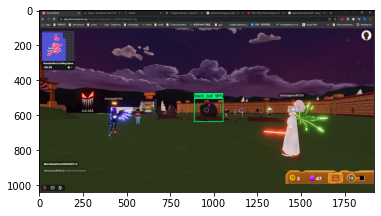

In [56]:
img = cv2.imread(IMAGE_PATH)
image_np = np.array(img)

input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)

detections = detect_fn(input_tensor)

num_detections = int(detections.pop('num_detections'))
detections = {key: value[0, :num_detections].numpy()
              for key, value in detections.items()}
detections['num_detections'] = num_detections

# detection_classes should be ints.
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

label_id_offset = 1
image_np_with_detections = image_np.copy()

viz_utils.visualize_boxes_and_labels_on_image_array(
            image_np_with_detections,
            detections['detection_boxes'],
            detections['detection_classes']+label_id_offset,
            detections['detection_scores'],
            category_index,
            use_normalized_coordinates=True,
            max_boxes_to_draw=5,
            min_score_thresh=.8,
            agnostic_mode=False)

plt.imshow(cv2.cvtColor(image_np_with_detections, cv2.COLOR_BGR2RGB))
plt.show()

# 10. Freezing the Graph

In [15]:
FREEZE_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'exporter_main_v2.py ')

In [16]:
command = "python {} --input_type=image_tensor --pipeline_config_path={} --trained_checkpoint_dir={} --output_directory={}".format(FREEZE_SCRIPT ,files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'], paths['OUTPUT_PATH'])

In [17]:
print(command)

python Tensorflow\models\research\object_detection\exporter_main_v2.py  --input_type=image_tensor --pipeline_config_path=Tensorflow\workspace\models\my_ssd_mobnet\pipeline.config --trained_checkpoint_dir=Tensorflow\workspace\models\my_ssd_mobnet --output_directory=Tensorflow\workspace\models\my_ssd_mobnet\export


In [18]:
!{command}

2021-04-03 11:51:42.281339: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library cudart64_110.dll
2021-04-03 11:51:44.712115: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-04-03 11:51:44.712813: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library nvcuda.dll
2021-04-03 11:51:44.734951: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:2b:00.0 name: GeForce RTX 2070 SUPER computeCapability: 7.5
coreClock: 1.785GHz coreCount: 40 deviceMemorySize: 8.00GiB deviceMemoryBandwidth: 417.29GiB/s
2021-04-03 11:51:44.734976: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library cudart64_110.dll
2021-04-03 11:51:44.738520: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library cublas64_11.dll
202

# 11. Conversion to TFJS

In [19]:
!pip install tensorflowjs

  Using cached tensorflowjs-3.3.0-py3-none-any.whl (63 kB)
  Using cached tensorflow_hub-0.9.0-py2.py3-none-any.whl (103 kB)
  Attempting uninstall: tensorflow-hub
    Found existing installation: tensorflow-hub 0.11.0
    Uninstalling tensorflow-hub-0.11.0:
      Successfully uninstalled tensorflow-hub-0.11.0


In [20]:
command = "tensorflowjs_converter --input_format=tf_saved_model --output_node_names='detection_boxes,detection_classes,detection_features,detection_multiclass_scores,detection_scores,num_detections,raw_detection_boxes,raw_detection_scores' --output_format=tfjs_graph_model --signature_name=serving_default {} {}".format(os.path.join(paths['OUTPUT_PATH'], 'saved_model'), paths['TFJS_PATH'])

In [21]:
print(command)

tensorflowjs_converter --input_format=tf_saved_model --output_node_names='detection_boxes,detection_classes,detection_features,detection_multiclass_scores,detection_scores,num_detections,raw_detection_boxes,raw_detection_scores' --output_format=tfjs_graph_model --signature_name=serving_default Tensorflow\workspace\models\my_ssd_mobnet\export\saved_model Tensorflow\workspace\models\my_ssd_mobnet\tfjsexport


In [22]:
!{command}

Writing weight file Tensorflow\workspace\models\my_ssd_mobnet\tfjsexport\model.json...


2021-04-03 11:54:23.153051: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library cudart64_110.dll
2021-04-03 11:54:25.644887: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-04-03 11:54:25.645576: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library nvcuda.dll
2021-04-03 11:54:25.667969: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:2b:00.0 name: GeForce RTX 2070 SUPER computeCapability: 7.5
coreClock: 1.785GHz coreCount: 40 deviceMemorySize: 8.00GiB deviceMemoryBandwidth: 417.29GiB/s
2021-04-03 11:54:25.668001: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library cudart64_110.dll
2021-04-03 11:54:25.671400: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library cublas64_11.dll
202

In [ ]:
# Test Code: https://github.com/nicknochnack/RealTimeSignLanguageDetectionwithTFJS

# 12. Conversion to TFLite

In [23]:
TFLITE_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'export_tflite_graph_tf2.py ')

In [24]:
command = "python {} --pipeline_config_path={} --trained_checkpoint_dir={} --output_directory={}".format(TFLITE_SCRIPT ,files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'], paths['TFLITE_PATH'])

In [25]:
print(command)

python Tensorflow\models\research\object_detection\export_tflite_graph_tf2.py  --pipeline_config_path=Tensorflow\workspace\models\my_ssd_mobnet\pipeline.config --trained_checkpoint_dir=Tensorflow\workspace\models\my_ssd_mobnet --output_directory=Tensorflow\workspace\models\my_ssd_mobnet\tfliteexport


In [26]:
!{command}

2021-04-03 11:55:05.530772: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library cudart64_110.dll
2021-04-03 11:55:08.004889: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-04-03 11:55:08.005672: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library nvcuda.dll
2021-04-03 11:55:08.028532: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:2b:00.0 name: GeForce RTX 2070 SUPER computeCapability: 7.5
coreClock: 1.785GHz coreCount: 40 deviceMemorySize: 8.00GiB deviceMemoryBandwidth: 417.29GiB/s
2021-04-03 11:55:08.028559: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library cudart64_110.dll
2021-04-03 11:55:08.032092: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library cublas64_11.dll
202

2021-04-03 11:55:14.884114: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1267]      0 
2021-04-03 11:55:14.884117: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1280] 0:   N 
2021-04-03 11:55:14.884182: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1406] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 6611 MB memory) -> physical GPU (device: 0, name: GeForce RTX 2070 SUPER, pci bus id: 0000:2b:00.0, compute capability: 7.5)
2021-04-03 11:55:14.884197: I tensorflow/compiler/jit/xla_gpu_device.cc:99] Not creating XLA devices, tf_xla_enable_xla_devices not set
W0403 11:55:15.360029 15552 save_impl.py:78] Skipping full serialization of Keras layer <object_detection.meta_architectures.ssd_meta_arch.SSDMetaArch object at 0x00000224AC2B1908>, because it is not built.
W0403 11:55:15.925411 15552 save_impl.py:78] Skipping full serialization of Keras layer <tensorflow.python.keras.layers.convolutional.SeparableConv2D object at 0x00000224D6D42B00>, bec

In [27]:
FROZEN_TFLITE_PATH = os.path.join(paths['TFLITE_PATH'], 'saved_model')
TFLITE_MODEL = os.path.join(paths['TFLITE_PATH'], 'saved_model', 'detect.tflite')

In [28]:
command = "tflite_convert \
--saved_model_dir={} \
--output_file={} \
--input_shapes=1,300,300,3 \
--input_arrays=normalized_input_image_tensor \
--output_arrays='TFLite_Detection_PostProcess','TFLite_Detection_PostProcess:1','TFLite_Detection_PostProcess:2','TFLite_Detection_PostProcess:3' \
--inference_type=FLOAT \
--allow_custom_ops".format(FROZEN_TFLITE_PATH, TFLITE_MODEL, )

In [29]:
print(command)

tflite_convert --saved_model_dir=Tensorflow\workspace\models\my_ssd_mobnet\tfliteexport\saved_model --output_file=Tensorflow\workspace\models\my_ssd_mobnet\tfliteexport\saved_model\detect.tflite --input_shapes=1,300,300,3 --input_arrays=normalized_input_image_tensor --output_arrays='TFLite_Detection_PostProcess','TFLite_Detection_PostProcess:1','TFLite_Detection_PostProcess:2','TFLite_Detection_PostProcess:3' --inference_type=FLOAT --allow_custom_ops


In [30]:
!{command}

2021-04-03 11:55:38.653963: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library cudart64_110.dll
2021-04-03 11:55:41.159460: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-04-03 11:55:41.160164: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library nvcuda.dll
2021-04-03 11:55:41.183623: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:2b:00.0 name: GeForce RTX 2070 SUPER computeCapability: 7.5
coreClock: 1.785GHz coreCount: 40 deviceMemorySize: 8.00GiB deviceMemoryBandwidth: 417.29GiB/s
2021-04-03 11:55:41.183649: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library cudart64_110.dll
2021-04-03 11:55:41.187402: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library cublas64_11.dll
202

# 13. Zip and Export Models 

In [ ]:
!tar -czf models.tar.gz {paths['CHECKPOINT_PATH']}

In [ ]:
from google.colab import drive
drive.mount('/content/drive')